In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [55]:
#https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238
df = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [56]:
#Understand dataset
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [57]:
df.tail()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
142457,A862082,NaN,08/02/2022 06:44:00 PM,Aug 2022,04/21/2022,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Black/White
142458,A689946,Tank,08/02/2022 07:19:00 PM,Aug 2022,10/11/2012,Return to Owner,NaN,Dog,Intact Male,9 years,Pit Bull Mix,White/Blue
142459,A854622,Cleo,08/02/2022 07:24:00 PM,Aug 2022,04/05/2020,Adoption,NaN,Cat,Spayed Female,2 years,Domestic Longhair Mix,Black
142460,A859257,*Nani,08/02/2022 04:59:00 PM,Aug 2022,02/10/2022,Adoption,NaN,Cat,Spayed Female,5 months,Domestic Longhair Mix,Black
142461,A862207,Coqueta,08/02/2022 07:29:00 PM,Aug 2022,11/22/2021,Adoption,NaN,Dog,Spayed Female,8 months,Siberian Husky,White


In [58]:
df.shape

(142462, 12)

In [59]:
df.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [60]:
df.isnull().sum()

Animal ID               0
Name                41861
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           22
Outcome Subtype     77122
Animal Type             0
Sex upon Outcome        1
Age upon Outcome       36
Breed                   0
Color                   0
dtype: int64

In [61]:
#Clean data
#Condense 'MonthYear' to just 'Year'
df = df.rename(columns = {'MonthYear':'Year'})

In [62]:
#Have 'Year' with only the Year (no month)
df['Year'] = df['Year'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [63]:
df.head()

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [64]:
#Rename null values in 'Name' column to UNKNOWN
#Do not drop these rows because they contain useful information
df['Name'].fillna('UNKNOWN', inplace=True)
df.head()

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,UNKNOWN,08/16/2020 11:38:00 AM,2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,UNKNOWN,03/18/2014 11:47:00 AM,2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [65]:
#Check 'Animal ID' to see if any animals were returned (for any reason)
#Check 'Animal ID' for duplicates
df['Animal ID'].duplicated().count()

142462

In [66]:
#Example of duplicate 'Animal ID'
df[df['Animal ID'].str.contains('A689946')]

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
29836,A689946,Tank,11/16/2017 07:12:00 PM,2017,10/11/2012,Return to Owner,NaN,Dog,Intact Male,5 years,Pit Bull Mix,White/Blue
36767,A689946,Tank,10/17/2014 02:45:00 PM,2014,10/11/2012,Return to Owner,NaN,Dog,Intact Male,2 years,Pit Bull Mix,White/Blue
88010,A689946,Tank,04/06/2016 06:00:00 PM,2016,10/11/2012,Return to Owner,NaN,Dog,Intact Male,3 years,Pit Bull Mix,White/Blue
142458,A689946,Tank,08/02/2022 07:19:00 PM,2022,10/11/2012,Return to Owner,NaN,Dog,Intact Male,9 years,Pit Bull Mix,White/Blue


There are quite a few duplicated Animal IDs. Looking at an example of a duplicated ID, we can see that there are animals that have revisited Austin Animal Center, for whatever reason that maybe. 

In [67]:
#Drop duplicates and keep most recent entry for animal
df = df.sort_values(by = 'Year', ascending = True)
df = df.drop_duplicates(subset = 'Animal ID', keep = 'last')
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

Animal ID               0
Name                    0
DateTime                0
Year                    0
Date of Birth           0
Outcome Type           21
Outcome Subtype     64482
Animal Type             0
Sex upon Outcome        1
Age upon Outcome       36
Breed                   0
Color                   0
dtype: int64

In [69]:
df[df['Outcome Type'].isna()]

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
25685,A679066,UNKNOWN,05/16/2014 12:00:00 AM,2014,04/16/2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
44758,A671017,UNKNOWN,01/20/2014 08:27:00 AM,2014,01/17/2013,NaN,NaN,Other,Unknown,1 year,Fox Mix,Brown/Black
111007,A686025,UNKNOWN,08/16/2014 08:35:00 AM,2014,08/15/2013,NaN,NaN,Other,Unknown,1 year,Bat Mix,Brown
94388,A674209,UNKNOWN,03/09/2014 06:15:00 PM,2014,03/09/2014,NaN,NaN,Other,Unknown,0 years,Bat Mix,Brown
66578,A815725,UNKNOWN,03/24/2020 01:42:00 PM,2020,03/24/2019,NaN,NaN,Other,Unknown,1 year,Bat,Black
93680,A830563,Zeus,03/11/2021 01:32:00 PM,2021,12/11/2019,NaN,NaN,Dog,Intact Male,1 year,Pit Bull,Black
3408,A828272,*Dawson,02/02/2021 06:01:00 PM,2021,01/12/2020,NaN,NaN,Dog,Neutered Male,1 year,Blue Lacy Mix,Blue/White
9030,A700839,*Turkey,01/12/2021 06:07:00 PM,2021,04/20/2014,NaN,NaN,Dog,Neutered Male,6 years,Pit Bull Mix,Blue
95695,A837337,UNKNOWN,06/21/2021 04:13:00 PM,2021,04/21/2021,NaN,NaN,Cat,Intact Male,1 month,Domestic Medium Hair,Black Smoke
47031,A836061,Elvira,07/24/2021 06:49:00 PM,2021,06/05/2019,NaN,NaN,Cat,Spayed Female,2 years,Domestic Shorthair,Tortie


In [70]:
#Drop rows with null values in 'Outcome Type'
df = df.dropna(axis=0, subset=['Outcome Type'])
df.isnull().sum()

Animal ID               0
Name                    0
DateTime                0
Year                    0
Date of Birth           0
Outcome Type            0
Outcome Subtype     64462
Animal Type             0
Sex upon Outcome        1
Age upon Outcome       36
Breed                   0
Color                   0
dtype: int64

In [71]:
#Check the null value in 'Sex upon Outcome' column
df[df['Sex upon Outcome'].isna()]

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
71449,A667395,Diego,11/27/2013 04:11:00 PM,2013,11/17/2006,Return to Owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


In [72]:
#Row contains valuable information
#Keep row, and rename null value to UNKNOWN 
df['Sex upon Outcome'].fillna('UNKNOWN', inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Animal ID               0
Name                    0
DateTime                0
Year                    0
Date of Birth           0
Outcome Type            0
Outcome Subtype     64462
Animal Type             0
Sex upon Outcome        0
Age upon Outcome       36
Breed                   0
Color                   0
dtype: int64

In [73]:
#Check the null values in 'Age upon Outcome' column
df[df['Age upon Outcome'].isna()]

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
140383,A859419,UNKNOWN,06/13/2022 05:22:00 PM,2022,05/20/2022,Euthanasia,NaN,Other,Unknown,NaN,Skunk,Black/White
140292,A859220,A859220,06/10/2022 02:15:00 PM,2022,06/10/2020,Euthanasia,Rabies Risk,Other,Unknown,NaN,Raccoon,Brown/Black
139239,A857265,UNKNOWN,05/14/2022 07:55:00 AM,2022,05/13/2020,Euthanasia,Rabies Risk,Other,Unknown,NaN,Bat,Brown
139666,A858112,UNKNOWN,05/25/2022 02:56:00 PM,2022,03/25/2022,Euthanasia,Rabies Risk,Other,Unknown,NaN,Fox,Gray
139667,A858109,UNKNOWN,05/25/2022 02:54:00 PM,2022,03/25/2022,Euthanasia,Rabies Risk,Other,Unknown,NaN,Fox,Gray
139668,A858099,UNKNOWN,05/25/2022 02:53:00 PM,2022,05/25/2021,Euthanasia,Rabies Risk,Other,Unknown,NaN,Bat,Brown
139781,A858321,UNKNOWN,05/28/2022 08:01:00 AM,2022,05/27/2020,Euthanasia,Rabies Risk,Other,Unknown,NaN,Bat,Brown
139689,A858176,A858176,05/26/2022 10:43:00 AM,2022,05/26/2020,Euthanasia,Rabies Risk,Other,Unknown,NaN,Bat,Brown
139676,A858089,A858089,05/25/2022 06:00:00 PM,2022,05/25/2020,Euthanasia,Rabies Risk,Other,Unknown,NaN,Bat,Brown
139673,A857718,UNKNOWN,05/25/2022 04:45:00 PM,2022,05/19/2018,Euthanasia,Aggressive,Dog,Intact Male,NaN,Pit Bull Mix,Blue/White


The rows that have missing age values in the "Age upon Outcome"are all "Euthanasia" outcomes, and a majority seem to be animal types that are not necessarily pets. 

I do not want to lose a good chunk of data regarding "Euthanasia" outcomes by dropping these nulls. I will rename the missing "Age upon Outcome" values to UNKNOWN. 

I will also rename missing "Outcome Subtype" values to UNKNOWN. I do not want to drop these rows because we will lose important data.

In [74]:
df['Age upon Outcome'].fillna('UNKNOWN', inplace=True)
df['Outcome Subtype'].fillna('UNKNOWN', inplace=True)
df.isnull().sum()

Animal ID           0
Name                0
DateTime            0
Year                0
Date of Birth       0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [75]:
#Reorganize ages into intervals
#See what ages exist
df.groupby(['Age upon Outcome'])['Animal ID'].count()

Age upon Outcome
-1 years         1
0 years        214
1 day          347
1 month       5901
1 week         797
1 weeks       1047
1 year       21185
10 months     1736
10 years      1912
11 months      730
11 years       723
12 years       935
13 years       608
14 years       429
15 years       369
16 years       162
17 years        91
18 years        55
19 years        26
2 days         409
2 months     16906
2 weeks       2374
2 years      19437
20 years        22
21 years         1
22 years         6
23 years         1
24 years         1
25 years         1
28 years         1
3 days         440
3 months      6556
3 weeks       2410
3 years       7027
30 years         1
4 days         255
4 months      4290
4 weeks       2042
4 years       4110
5 days         173
5 months      3193
5 weeks        153
5 years       3846
6 days         262
6 months      3123
6 years       2558
7 months      1597
7 years       2202
8 months      1959
8 years       2295
9 months      1255
9 years       

In [76]:
#Check what '-1 years' is
df[df['Age upon Outcome'] == '-1 years']

,Animal ID,Name,DateTime,Year,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
60845,A757376,Gorda,10/21/2018 07:01:00 PM,2018,11/05/2019,Return to Owner,UNKNOWN,Dog,Spayed Female,-1 years,Miniature Schnauzer Mix,White


In [77]:
#Drop -1 year (not possible, possible imputation mistake)
df.drop([60845], axis=0, inplace = True)
df.groupby(['Age upon Outcome'])['Animal ID'].count()

Age upon Outcome
0 years        214
1 day          347
1 month       5901
1 week         797
1 weeks       1047
1 year       21185
10 months     1736
10 years      1912
11 months      730
11 years       723
12 years       935
13 years       608
14 years       429
15 years       369
16 years       162
17 years        91
18 years        55
19 years        26
2 days         409
2 months     16906
2 weeks       2374
2 years      19437
20 years        22
21 years         1
22 years         6
23 years         1
24 years         1
25 years         1
28 years         1
3 days         440
3 months      6556
3 weeks       2410
3 years       7027
30 years         1
4 days         255
4 months      4290
4 weeks       2042
4 years       4110
5 days         173
5 months      3193
5 weeks        153
5 years       3846
6 days         262
6 months      3123
6 years       2558
7 months      1597
7 years       2202
8 months      1959
8 years       2295
9 months      1255
9 years       1260
UNKNOWN       

In [78]:
#Rename age of those younger than or equal to 1 year
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['0 years','1 day','1 month','1 week','1 weeks','1 year','10 months','11 months','2 days','2 months','2 weeks','3 days','3 months','3 weeks','4 days','4 months','4 weeks','5 days','5 months','5 weeks','6 days','6 months','7 months','8 months','9 months'],'<= 1 Year')

In [79]:
#Rename those between 2-7 years old, '2-7 Years Old'
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['2 years','3 years', '4 years', '5 years', '6 years', '7 years'], '2-7 Years Old')

In [80]:
#Rename those between 8-13 years old, '8-13 Years Old'
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['8 years', '9 years', '10 years', '11 years', '12 years', '13 years'], '8-13 Years Old')

In [81]:
#Rename those between 14-19 years old, '14-19 Years Old'
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['14 years', '15 years', '16 years', '17 years', '18 years', '19 years'], '14-19 Years Old')

In [82]:
#Rename those between 20-25 years old, '20-25 Years Old'
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['20 years', '21 years', '22 years', '23 years', '24 years', '25 years'], '20-25 Years Old')

In [83]:
#Rename those older than or equal to 26 years old, '>= 26 Years Old'
df['Age upon Outcome'] = df['Age upon Outcome'].replace(['28 years', '30 years'], '>= 26 Years Old')

In [84]:
#Check that our 'Age upon Outcome' have been updated
df.groupby(['Age upon Outcome'])['Animal ID'].count()

Age upon Outcome
14-19 Years Old     1132
2-7 Years Old      39180
20-25 Years Old       32
8-13 Years Old      7733
<= 1 Year          79354
>= 26 Years Old        2
UNKNOWN               36
Name: Animal ID, dtype: int64

In [85]:
#Drop extra columns
df = df.drop(columns=['DateTime', 'Date of Birth'])
df

,Animal ID,Name,Year,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
120524,A667550,Dixie,2013,Return to Owner,UNKNOWN,Dog,Spayed Female,2-7 Years Old,Pit Bull Mix,Brown/White
3890,A668326,*Rex,2013,Adoption,UNKNOWN,Cat,Neutered Male,<= 1 Year,Domestic Shorthair Mix,Brown Tabby
106075,A652773,Milan,2013,Adoption,Foster,Cat,Spayed Female,<= 1 Year,Domestic Shorthair Mix,Brown Tabby/White
64859,A664498,Gypsy,2013,Adoption,Foster,Dog,Spayed Female,2-7 Years Old,Mastiff/Dutch Shepherd,Brown Brindle
35184,A662943,*Harry,2013,Adoption,UNKNOWN,Cat,Neutered Male,<= 1 Year,Domestic Shorthair Mix,Black
...,...,...,...,...,...,...,...,...,...,...
137507,A853451,*Bobolink,2022,Adoption,UNKNOWN,Dog,Neutered Male,2-7 Years Old,Chihuahua Shorthair Mix,Fawn/Tan
137505,A853434,*Widgeon,2022,Transfer,Partner,Dog,Intact Female,<= 1 Year,Redbone Hound/German Shepherd,Brown
137501,A853857,Diamond,2022,Return to Owner,UNKNOWN,Dog,Spayed Female,2-7 Years Old,German Shepherd,Brown/Black
137499,A850694,A850694,2022,Adoption,Foster,Other,Neutered Male,<= 1 Year,Rabbit Sh,Agouti


In [86]:
df.groupby(['Outcome Type'])['Animal ID'].count()

Outcome Type
Adoption           57096
Died                1329
Disposal             640
Euthanasia          9268
Lost                   1
Missing               60
Relocate              26
Return to Owner    18391
Rto-Adopt            696
Stolen                 2
Transfer           39960
Name: Animal ID, dtype: int64

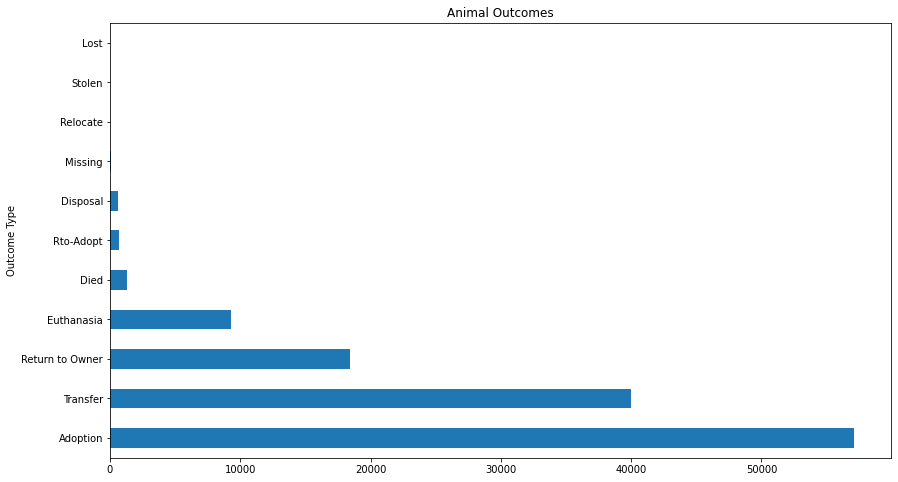

In [87]:
df.groupby(['Outcome Type'])['Animal ID'].count().sort_values(ascending=False).plot(figsize=(14,8), title='Animal Outcomes', kind='barh')

In [88]:
df.groupby(['Outcome Type', 'Age upon Outcome'])['Animal ID'].count()

Outcome Type     Age upon Outcome
Adoption         14-19 Years Old       201
                 2-7 Years Old       14344
                 8-13 Years Old       2436
                 <= 1 Year           40115
Died             14-19 Years Old         7
                 2-7 Years Old         240
                 8-13 Years Old         86
                 <= 1 Year             996
Disposal         14-19 Years Old         1
                 2-7 Years Old         207
                 8-13 Years Old          8
                 <= 1 Year             424
Euthanasia       14-19 Years Old       165
                 2-7 Years Old        3549
                 20-25 Years Old        11
                 8-13 Years Old        651
                 <= 1 Year            4856
                 UNKNOWN                36
Lost             2-7 Years Old           1
Missing          2-7 Years Old          12
                 8-13 Years Old          2
                 <= 1 Year              46
Relocate         14-

In [89]:
#Creating dataframes of the age distribution of the top 3 outcomes
df_adoption = df[df['Outcome Type'].str.contains('Adoption')]
df_transfer= df[df['Outcome Type'].str.contains('Transfer')]
df_return_to_owner = df[df['Outcome Type'].str.contains('Return to Owner')]

(0.0, 50000.0)

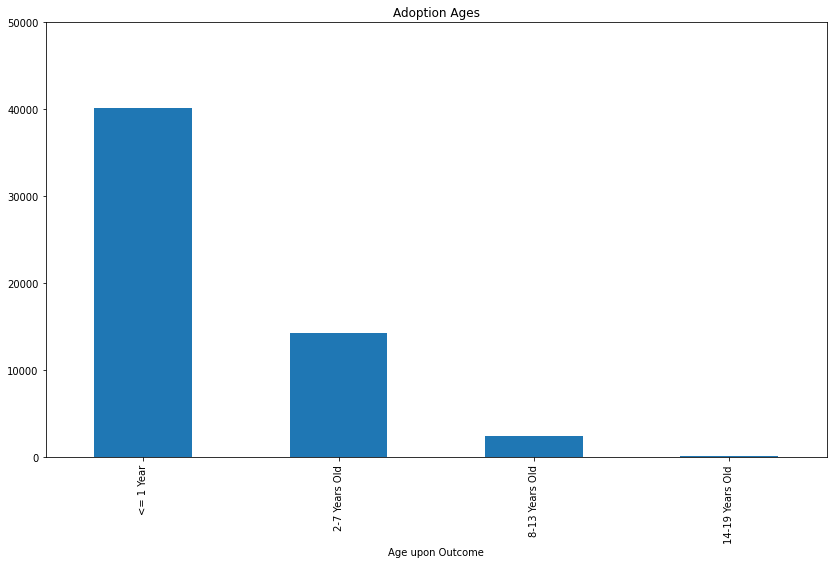

In [90]:
#Create Visualization for adoption
df_adoption.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False).plot(figsize=(14,8), title='Adoption Ages', kind='bar').set_ylim([0, 50000])

In [91]:
#Create corresponding information
df_adoption.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False)

Age upon Outcome
<= 1 Year          40115
2-7 Years Old      14344
8-13 Years Old      2436
14-19 Years Old      201
Name: Animal ID, dtype: int64

(0.0, 50000.0)

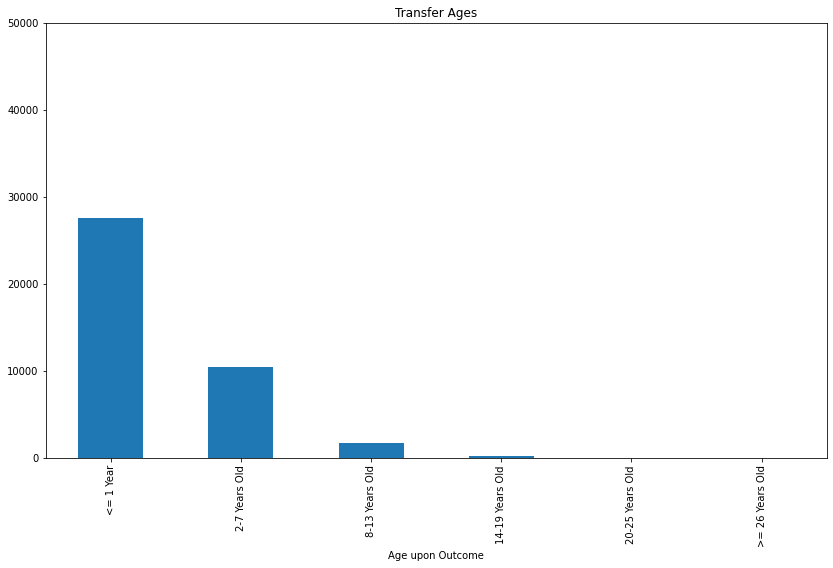

In [92]:
#Create Visualization for transfers
df_transfer.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False).plot(figsize=(14,8), title='Transfer Ages', kind='bar').set_ylim([0, 50000])

In [93]:
df_transfer.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False)

Age upon Outcome
<= 1 Year          27564
2-7 Years Old      10471
8-13 Years Old      1714
14-19 Years Old      206
20-25 Years Old        4
>= 26 Years Old        1
Name: Animal ID, dtype: int64

(0.0, 50000.0)

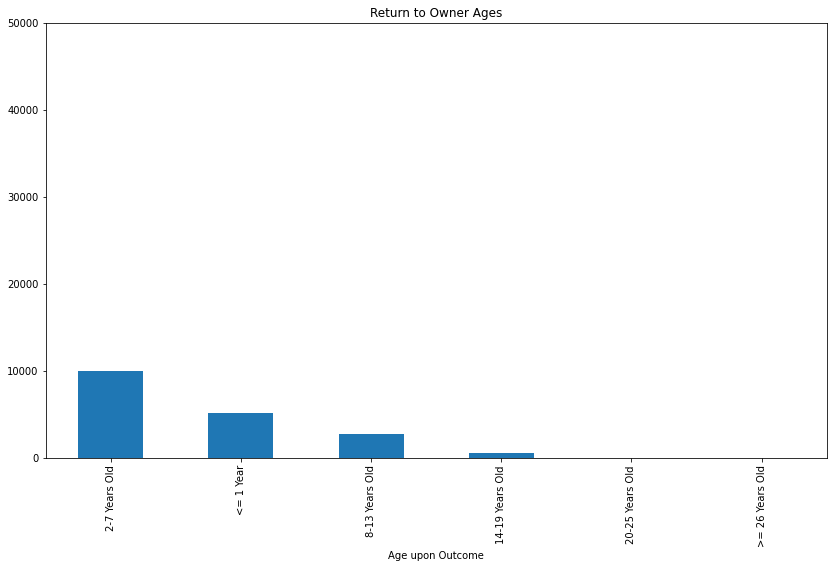

In [94]:
#Create Visualization for return to owners
df_return_to_owner.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False).plot(figsize=(14,8), title='Return to Owner Ages', kind='bar').set_ylim([0, 50000])

In [95]:
df_return_to_owner.groupby(['Age upon Outcome'])['Animal ID'].count().sort_values(ascending=False)

Age upon Outcome
2-7 Years Old      9963
<= 1 Year          5105
8-13 Years Old     2763
14-19 Years Old     542
20-25 Years Old      17
>= 26 Years Old       1
Name: Animal ID, dtype: int64

In [96]:
#Check details for the different outcome types
df.groupby(['Outcome Type', 'Outcome Subtype'])['Animal ID'].count()

Outcome Type     Outcome Subtype    
Adoption         Barn                       3
                 Foster                 12243
                 Offsite                  406
                 UNKNOWN                44444
Died             At Vet                    98
                 Emergency                  8
                 Enroute                   91
                 In Foster                312
                 In Kennel                677
                 In Surgery                28
                 UNKNOWN                  115
Disposal         UNKNOWN                  640
Euthanasia       Aggressive               539
                 At Vet                   201
                 Behavior                 151
                 Court/Investigation       40
                 Medical                  329
                 Rabies Risk             4141
                 Suffering               3574
                 UNKNOWN                  257
                 Underage                  

In [97]:
#Want to know reasons for Euthanasia cases
#Creating dataframe of Euthanasia subtypes
df_euthanasia = df[df['Outcome Type'].str.contains('Euthanasia')]
df_euthanasia.groupby(['Outcome Subtype'])['Animal ID'].count().sort_values(ascending=False)

Outcome Subtype
Rabies Risk            4141
Suffering              3574
Aggressive              539
Medical                 329
UNKNOWN                 257
At Vet                  201
Behavior                151
Court/Investigation      40
Underage                 36
Name: Animal ID, dtype: int64

In [98]:
#Euthanasia rates over the years
df_euthanasia.groupby(['Outcome Type', 'Year'])['Animal ID'].count()

Outcome Type  Year
Euthanasia    2013     458
              2014    1818
              2015    1448
              2016    1153
              2017    1076
              2018     806
              2019     781
              2020     695
              2021     594
              2022     439
Name: Animal ID, dtype: int64

In [99]:
#Adoption rates over the years
df_adoption.groupby(['Outcome Type', 'Year'])['Animal ID'].count()

Outcome Type  Year
Adoption      2013    1606
              2014    6116
              2015    6358
              2016    6872
              2017    6890
              2018    6772
              2019    8289
              2020    4431
              2021    6190
              2022    3572
Name: Animal ID, dtype: int64

(0.0, 10000.0)

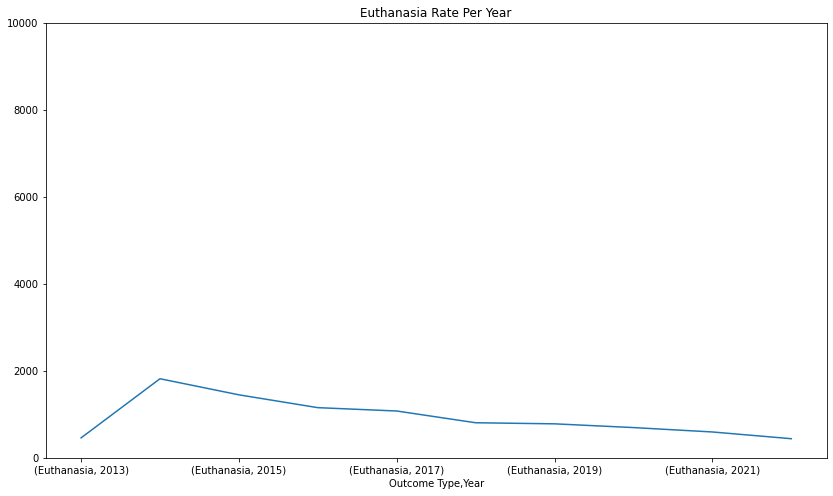

In [100]:
#Visualization of Euthanasia over the years
df_euthanasia.groupby(['Outcome Type', 'Year'])['Animal ID'].count().plot(figsize=(14,8), title='Euthanasia Rate Per Year', kind='line').set_ylim([0, 10000])

(0.0, 10000.0)

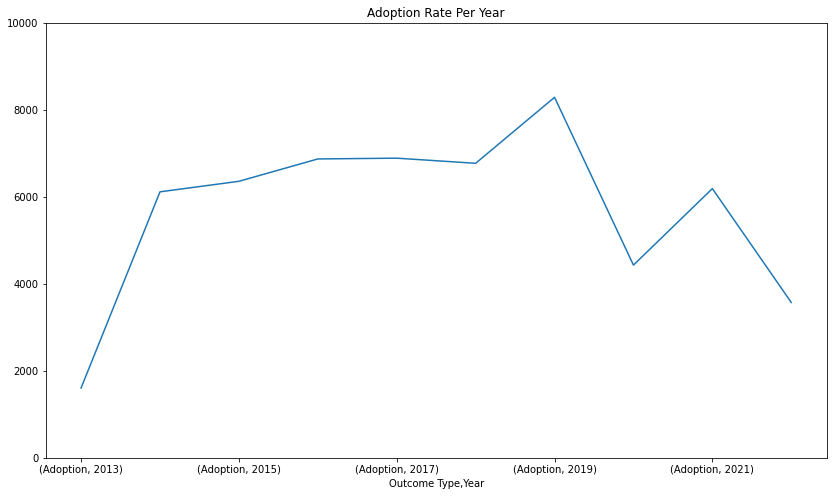

In [101]:
#Visualization of Adoptions over the years
df_adoption.groupby(['Outcome Type', 'Year'])['Animal ID'].count().plot(figsize=(14,8), title='Adoption Rate Per Year', kind='line').set_ylim([0, 10000])

In [102]:
#Top breeds being euthanized
df_euthanasia.groupby(['Breed'])['Animal ID'].count().sort_values(ascending=False)

Breed
Bat                           1585
Bat Mix                       1522
Domestic Shorthair Mix        1337
Raccoon                        537
Raccoon Mix                    503
                              ... 
Golden Retriever                 1
Great Dane Mix                   1
Akita                            1
Harrier Mix                      1
Greyhound/Airedale Terrier       1
Name: Animal ID, Length: 395, dtype: int64

In [103]:
#Top Animal Types being adopted
df_adoption.groupby(['Animal Type'])['Animal ID'].count().sort_values(ascending=False)

Animal Type
Dog          31855
Cat          24299
Other          694
Bird           236
Livestock       12
Name: Animal ID, dtype: int64

In [104]:
df['Outcome Type'].count()

127469

In [105]:
#Percent of outcomes that are Euthanasia
(9268/127469)*100

7.270787407134284

The top 3 outcomes for animals are adoption, trasnfer, or return to owner. Euthanasia for animals are done for the following top 3 reasons: Rabies Risk, Suffering, and Aggressive. 

There seems to be a decrease in Euthanasia over the years, but, there is also a decrease in outcome data over the years. 

There is an overall increase in adoptions over the years. Sadly, there was a dip in adoptions during the time period of the Pandemic. However, it does seem to be increasing once again. 

Out of all the outcomes, Euthanasia is only 7% of the possible outcomes. 